## Этап 1. Приоритезация гипотез

Импорт библиотек

In [42]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt

Прочитаем файл с данными и сохраним его в переменной data.

In [43]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [44]:
pd.options.display.max_colwidth = 110

Получение первых 10 строк таблицы.

In [45]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE

In [54]:
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']

In [55]:
data['ICE'] = data['ICE'].round(2)
data.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наибольший приоритет по рейтингу ICE имеют гипотезы под номерами 8 (Запустить акцию, дающую скидку на товар в день рождения), 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) и 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) ввиду их высокой силы, уверенности и низких затрат.

Применим фреймворк RICE

In [56]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']

In [57]:
data.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Наибольший приоритет по рейтингу RICE имеют гипотезы под номерами 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа) и 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей).

Выводы

При применении RICE гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась в рейтинге на первое место, так как помимо высокой силы, уверенности и низких затрат был учтён большой размер аудитории, на которую она повлияет. В то же время гипотеза под номером 8 исчезла из тройки лидеров ввиду своего крайне маленького охвата.

## Этап 2. Анализ результатов A/B-теста

Прочитаем файлы с данными и сохраним в переменной

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Получение первых и последних строк таблиц

In [10]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Данные загружены, форматы поправлены. Далее проверим, что никто не попал в обе тестовых группы.

In [14]:
cheaters = orders.groupby('visitorId').agg({'group' : 'count'}).query('group == 2').reset_index()
cheaters = cheaters['visitorId']

In [15]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [16]:
#orders = orders.query('revenue < 100000') # not in @cheaters')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


64 человека были в обеих группах - удалили их.

Построим график кумулятивной выручки по группам

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


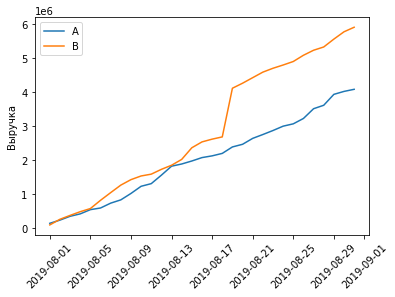

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.ylabel('Выручка')
plt.legend();

Выручка равномерно увеличивается в течении теста. В группе В присутствует резкий скачёк, что может сигнализировать либо о всплеске числа заказов, либо о появлении очень дорогого заказа. Группа А стабильно хуже группы В.

Построим график кумулятивного среднего чека по группам

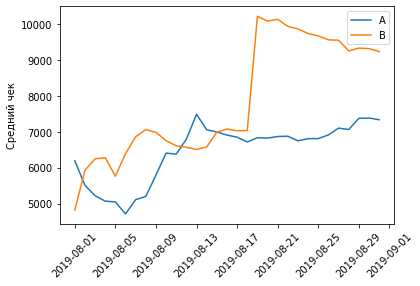

In [39]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.ylabel('Средний чек')
plt.legend();

Средний чек более менее выравнивается для группы А. В группе В наблюдается резкий скачёк в тот же момент, что и на графике кумулятивной выручки. Это косвенно доказывает наличие очень дорого заказа в выборке. Из-за этого скачка во второй половине наблюдаемого периода группа В не успевает прийти к реальному среднему чеку к концу наблюдений, требуется больше данных. Однако всё равно отметим, что согласно имеющимся данным, средний чек в группе В стабильно выше.

Построим график относительного изменения кумулятивного среднего чека

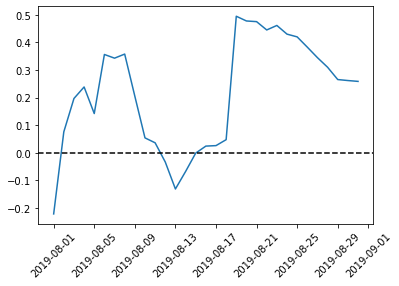

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.xticks(rotation = 45)
plt.axhline(y=0, color='black', linestyle='--');

График выше пунктирной линии, значит, формально, группа В лучше. Однако выбросы не позволяют утверждать этого с полной уверенностью, так как график "задран" тем очень дорогим заказом, который мы наблюдали на всех предыдущих графиках.

Построим график кумулятивного среднего количества заказов по группам

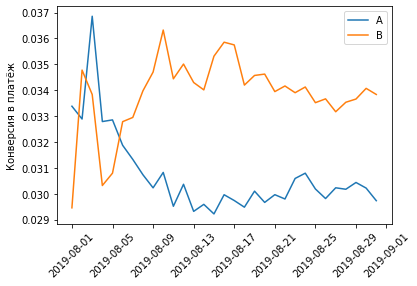

In [40]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation = 45)
plt.ylabel('Конверсия в платёж')
plt.legend();



Конверсия группы В стабильно выше. При этом группы более менее зафиксировались.

Построим график относительного изменения кумулятивного среднего количества заказов

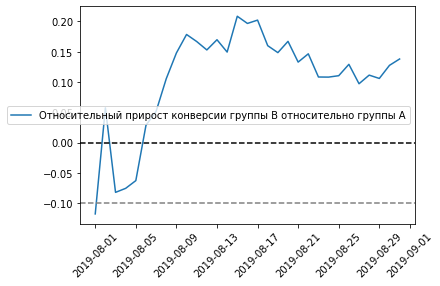

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation = 45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');


Конверсия группы В быстро вырвалась наверх, потом сильно просела, но, под конец, снова начала расти. Может она ещё не успела выравниться, но очень сомнительно, что группе А удасться вырваться вперёд.

Построим точечный график количества заказов по пользователям

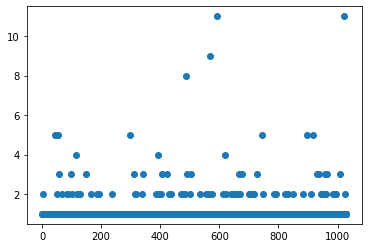

In [23]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

ordersByUsers.columns = ['user_id', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);


Большинство покупателей заказывали только один раз. Доля пользователей с 2-3 заказами тоже значительна. 4 и более уже похожи на выбросы.

Определим 95-й и 99-й перцентили количества заказов на пользователя

In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформили  более 2 заказа и не более 1% заказывали больше 4 раз. Так как граница на 95-ом перцентиле отсечёт всех, кто сделал более одного заказа, выберем границей 2 заказа.

Построим точечный график стоимостей заказов

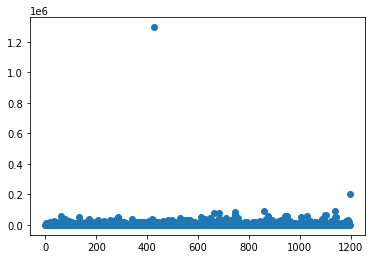

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Чётко видим два ОЧЕНЬ аномальных заказа - за 250 000 и за 1.3 миллиона.

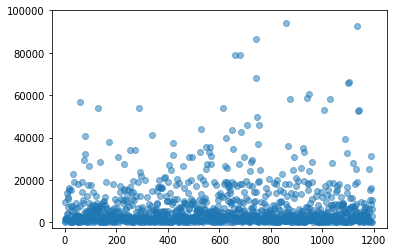

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.axis([-50, 1250, -2500, 100000]);

Так видим, что подавляющее большинство заказов примерно на 20 000 или меньше.

Определим 95-й и 99-й перцентили стоимости заказов

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233. Так как разница между 95-ым и 99-ым перцентил более чем в 2 раза, выберем границей 28 000

## Этап 3. Проверка гипотез на основе собранных данных

Подготовим данные для проверки гипотез

In [28]:
# количество пользователей по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество пользователей по дням с накоплением в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [29]:
# количество пользователей по дням в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество пользователей по дням с накоплением в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [30]:
# количество заказов и выручка по дням в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# количество заказов и выручка по дням с накоплением в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [31]:
# количество заказов и выручка по дням в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# количество заказов и выручка по дням с накоплением в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [32]:
# собираем всё вместе
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [33]:
# число заказов каждого пользователя в группе А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

# число заказов каждого пользователя в группе В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

   
Проверка гипотезы: Между группами нет различий в среднем количестве заказов;

```
H_0: Количество заказов в группе А = количество заказов в группе В`
H_1: Количество заказов в группе А != количество заказов в группе В`
alpha = 0.05
```


In [34]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный выигрыш группы B:', "{0:.2%}".format((sampleB.mean() / sampleA.mean() - 1)))

p-value = 0.01679
Относительный выигрыш группы B: 13.81%


p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, отвергаем.

Вывод: По «сырым» данным различия в среднем количестве заказов групп A и B есть.

Относительный выигрыш группы B равен 13.81%.

Проверка гипотезы: Средний чек между групами не отличается;

```
H_0: Средний чек в группе А = средний чек в группе В`
H_1: Средний чек в группе А != средний чек в группе В`
alpha = 0.05
```


In [35]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный выигрыш группы B:', '{0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный выигрыш группы B: 25.87%


p-value больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.

Вывод: По «сырым» данным различий в среднем чеке заказа групп A и B нет.

Относительный выигрыш группы B равен 25.87%.

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.shape[0])

74


Проверка гипотезы: Нет различий между группами в среднем количестве заказов;

```
H_0: Количество заказов в группе А = количество заказов в группе В`
H_1: Количество заказов в группе А != количество заказов в группе В`
alpha = 0.05
```


In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный выигрыш группы B:', '{0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.013
Относительный выигрыш группы B: 17.27%


p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, отвергаем.

Вывод: По «очищенным» данным различия в среднем количестве заказов групп A и B есть.

Относительный выигрыш группы B равен 17.27%.

Благодаря чистке данных p-value ещё сильнее приблизился к 0, разница между сегментами увеличилась с 14% до 17%.

   
Проверка гипотезы: Средний чек между групами не отличается;

```
H_0: Средний чек в группе А = средний чек в группе В`
H_1: Средний чек в группе А != средний чек в группе В`
alpha = 0.05
```


In [38]:
print(
    'p-value =', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный проигрыш группы B:', "{0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.738
Относительный проигрыш группы B: -1.96%


p-value больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, не отвергаем.

Вывод: По «очищенным» данным различий в среднем чеке заказа групп A и B нет.

Относительный проигрыш группы B равен 1.96%.

Благодаря чистке данных p-value увеличился, разница между сегментами уменьшилась с 26% в пользу группы В до 2% в пользу группы А.

## Этап 4. Решение по результатам теста

Имеющиеся факты:

 * Есть статистически значимое различие по среднему количеству заказов между группами; 
 * Нет статистически значимого различия по среднему чеку между группами;
 * График различия конверсии между группами сообщает, что результаты группы B лучше группы A, и, несмотря на некоторое ухудшение, в последние дни наблюдается тендеция к улучшению;
 * График различия среднего чека не показателен из-за невероятно аномального заказа, ему требуется больше времени, чтобы зафиксироваться на уровне реального различия.

То-есть сделав некоторое изменение (проверяемая гипотеза, к сожалению, не указана) нам удалось увеличить количество заказов (конверсию в покупку) для группы В. Однако это не повлияло на средний чек.

Исходя из обнаруженных фактов,  тест следует остановить и:
 * признать его успешным, если целью было увеличить конверсию. Продолжать смысла нет, группа В сильно опережает группу А и отрывается всё дальше.
 * признать его неуспешным, если целью было увеличить средний чек. Продолжать смысла нет, группа выигрывала исключительно за счёт невероятно аномального заказа, а в целом почти на всём периоде наблюдений для неё наблюдается ухудшение.